In [126]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import seaborn as sns

mpl.style.use('ggplot')
pd.set_option('max_columns', None)

In [12]:
df_can = pd.read_excel('Canada.xlsx', 
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_can.drop(columns=['AREA', 'REG', 'DEV', 'Type', 'Coverage'], inplace=True)
df_can.rename(columns={'OdName': 'Country',
                       'AreaName': 'Continent',
                       'RegName': 'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)

years = list(map(str, range(1980, 2014)))
display(df_can.head())

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
Country                                                                      
Afghanistan       39    47    71   340   496   741   828  1076  1028  1378   
Albania            0     0     0     0     1     2     2     3     3    21   
Algeria           71    69    63    44    69   132   242   434   491   872   
American Samoa     0     0     0     0     0     1     0     1     2     0   
Andorra            0     0     0     0     2     0     0     0     3     0   

                1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  \
Country                                                                      
Afghanistan     1170   713   858  1537  2212  2555  1999  2395  3326  4067   
Albania           56    96    71    63   113   307   574  1264  1816  1602   
Algeria          795   717   595  1106  2054  1842  2292  2389  2867  3418   
American Samoa     0     0     0     0     0     0     0     0     0     0   
Andorra            1     0     0     0     0     0     2     0     0     1   

                2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  \
Country                                                                      
Afghanistan     3697  3479  2978  3436  3009  2652  2111  1746  1758  2203   
Albania         1021   853  1450  1223   856   702   560   716   561   539   
Algeria         3406  3072  3616  3626  4807  3623  4005  5393  4752  4325   
American Samoa     0     0     0     0     1     0     0     0     0     0   
Andorra            0     2     0     0     1     1     0     0     0     0   

                2012  2013  Total  
Country                            
Afghanistan     2635  2004  58639  
Albania          620   603  15699  
Algeria         3774  4331  69439  
American Samoa     0     0      6  
Andorra            1     1     15

In [15]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  \
Country                                                                     
Denmark    93    73    93   109   129   129   118   111   158   186    93   
Norway     31    54    56    80    73    76    83   103    74    92    60   
Sweden    128   158   187   198   171   182   130   167   179   203   192   

         1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  \
Country                                                                     
Denmark   111    70    83    63    81    93    81    70    89    89    62   
Norway     65    70   104    31    36    56    78    74    77    73    57   
Sweden    176   161   151   123   170   138   184   149   161   129   205   

         2006  2007  2008  2009  2010  2011  2012  2013  Total  
Country                                                         
Denmark   101    97   108    81    92    93    94    81   3901  
Norway     53    73    66    75    46    49    53    59   2327  
Sweden    139   193   165   167   159   134   140   140   5866

In [16]:
df_dsn['Total']

Country
Denmark    3901
Norway     2327
Sweden     5866
Name: Total, dtype: int64

In [19]:
total_values = sum(df_dsn['Total'])
category_proportion = [(value / total_values) for value in df_dsn['Total']]
print(total_values)
category_proportion

12094


[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

In [25]:
for i, proportion in enumerate(category_proportion):
    print('{} = {}%'.format(df_dsn.index[i], round(proportion*100, 2)))

Denmark = 32.26%
Norway = 19.24%
Sweden = 48.5%


In [26]:
width = 40
height = 10

total_num_tiles = width*height
print('Number of tiles = {}'.format(total_num_tiles))

Number of tiles = 400


In [28]:
tiles_per_category = [round(proportion * total_num_tiles) 
                      for proportion in category_proportion]
for i, tiles in enumerate(tiles_per_category):
    print('{} = {}'.format(df_dsn.index[i], tiles))

Denmark = 129
Norway = 77
Sweden = 194


In [41]:
len(waffle_chart[0])

40

In [44]:
waffle_chart = np.zeros((height, width))
print('Before:\n{}'.format(waffle_chart))
print()

category_index = 0
tile_index = 0

for c in range(width):
    for r in range(height):
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle_chart[r, c] = category_index
display(waffle_chart)

Before:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

In [58]:
waffle_chart = np.zeros((height, width))
category_index = 0
tile_index = 0

for c in range(width):
    for r in range(height):
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle_chart[r, c] = category_index
    
print(waffle_chart)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [51]:
print(tiles_per_category)
print(tile_index)
print(category_index)
print(sum(tiles_per_category[0:category_index]))

[129, 77, 194]
1
1
129


<Figure size 432x288 with 0 Axes>

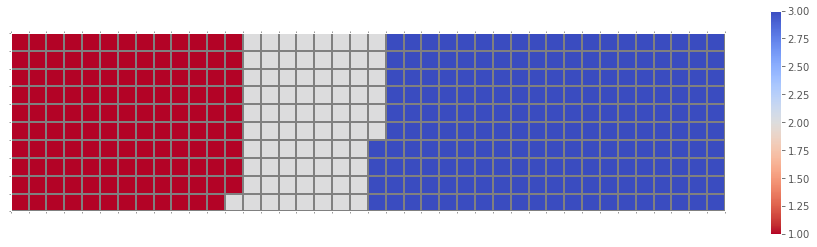

In [65]:
fig = plt.figure()

colormap = plt.cm.coolwarm_r
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

In [79]:
def create_waffle_chart(values, height, width, colormap):
    total_values = sum(values)
    
    category_proportion = [(value / total_values) for value in values]
    
    total_num_tiles = width * height
    print('Num of tiles = {}'.format(total_num_tiles))
    
    tiles_per_category = [round(proportion * total_num_tiles) for proportion 
                          in category_proportion]
    
    waffle_chart = np.zeros((height, width))
    category_index = 0
    tile_index = 0
    
    for col in range(width):
        for row in range(height):
            tile_index += 1
            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1
                
            waffle_chart[row, col] = category_index
            
    fig = plt.figure()

    list_cmap = {'coolwarm': plt.cm.coolwarm,
                 'coolwarm_r': plt.cm.coolwarm_r,
                 'YlGn': plt.cm.YlGn, 
                 'YlOrBr': plt.cm.YlOrBr}
    colormap = list_cmap[colormap]
    print(colormap)
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])
    plt.show()

Num of tiles = 400


<Figure size 432x288 with 0 Axes>

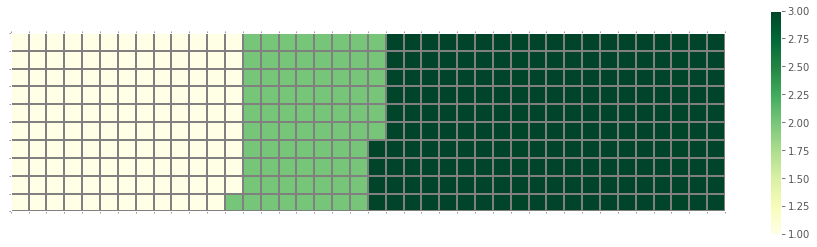

In [78]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

create_waffle_chart(values=df_dsn['Total'], height=10, width=40, colormap='YlGn')

Continent              Region             DevName  1980  1981  1982  \
Country                                                                         
China          Asia        Eastern Asia  Developing regions  5123  6682  3308   
Japan          Asia        Eastern Asia   Developed regions   701   756   598   
Indonesia      Asia  South-Eastern Asia  Developing regions   186   178   252   

           1983  1984  1985  1986  1987  1988  1989  1990   1991   1992  1993  \
Country                                                                         
China      1863  1527  1816  1960  2643  2758  4323  8076  14255  10846  9817   
Japan       309   246   198   248   422   324   494   379    506    605   907   
Indonesia   115   123   100   127   213   270   260   227    252    243   278   

            1994   1995   1996   1997   1998   1999   2000   2001   2002  \
Country                                                                    
China      13128  14398  19415  20475  21049  30069  35529  36434  31961   
Japan        956    826    994    924    897   1083   1010   1092    806   
Indonesia    262    205    231    166    165    525   1138    907    709   

            2003   2004   2005   2006   2007   2008   2009   2010   2011  \
Country                                                                    
China      36439  36619  42584  33518  27642  30037  29622  30391  28502   
Japan        817    973   1067   1212   1250   1284   1194   1168   1265   
Indonesia    515    552    632    613    657    661    504    712    390   

            2012   2013   Total  
Country                          
China      33024  34129  659962  
Japan       1214    982   27707  
Indonesia    395    387   13150

Num of tiles = 400


<Figure size 432x288 with 0 Axes>

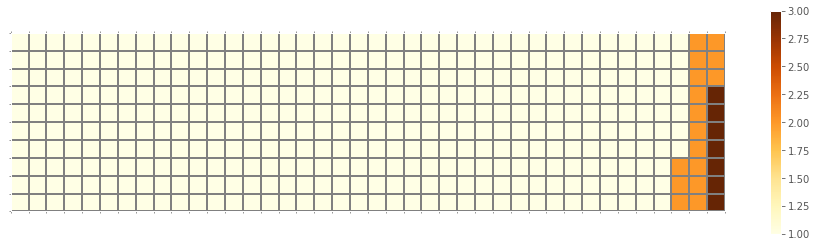

In [85]:
df_new = df_can.loc[['China', 'Japan', 'Indonesia'], :]
display(df_new)

create_waffle_chart(values=df_new['Total'], 
                    height=10, 
                    width=40, colormap='YlOrBr')

In [113]:
import urllib
content = urllib.request.urlopen(url) 
alice_novel = content.read().decode('utf8')

In [116]:
stop = set(STOPWORDS)

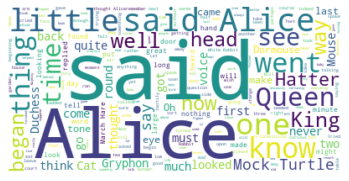

In [121]:
alice_wc = WordCloud(background_color='white',
                     max_words=2000,
                     stopwords=stop)

alice_wc.generate(alice_novel)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

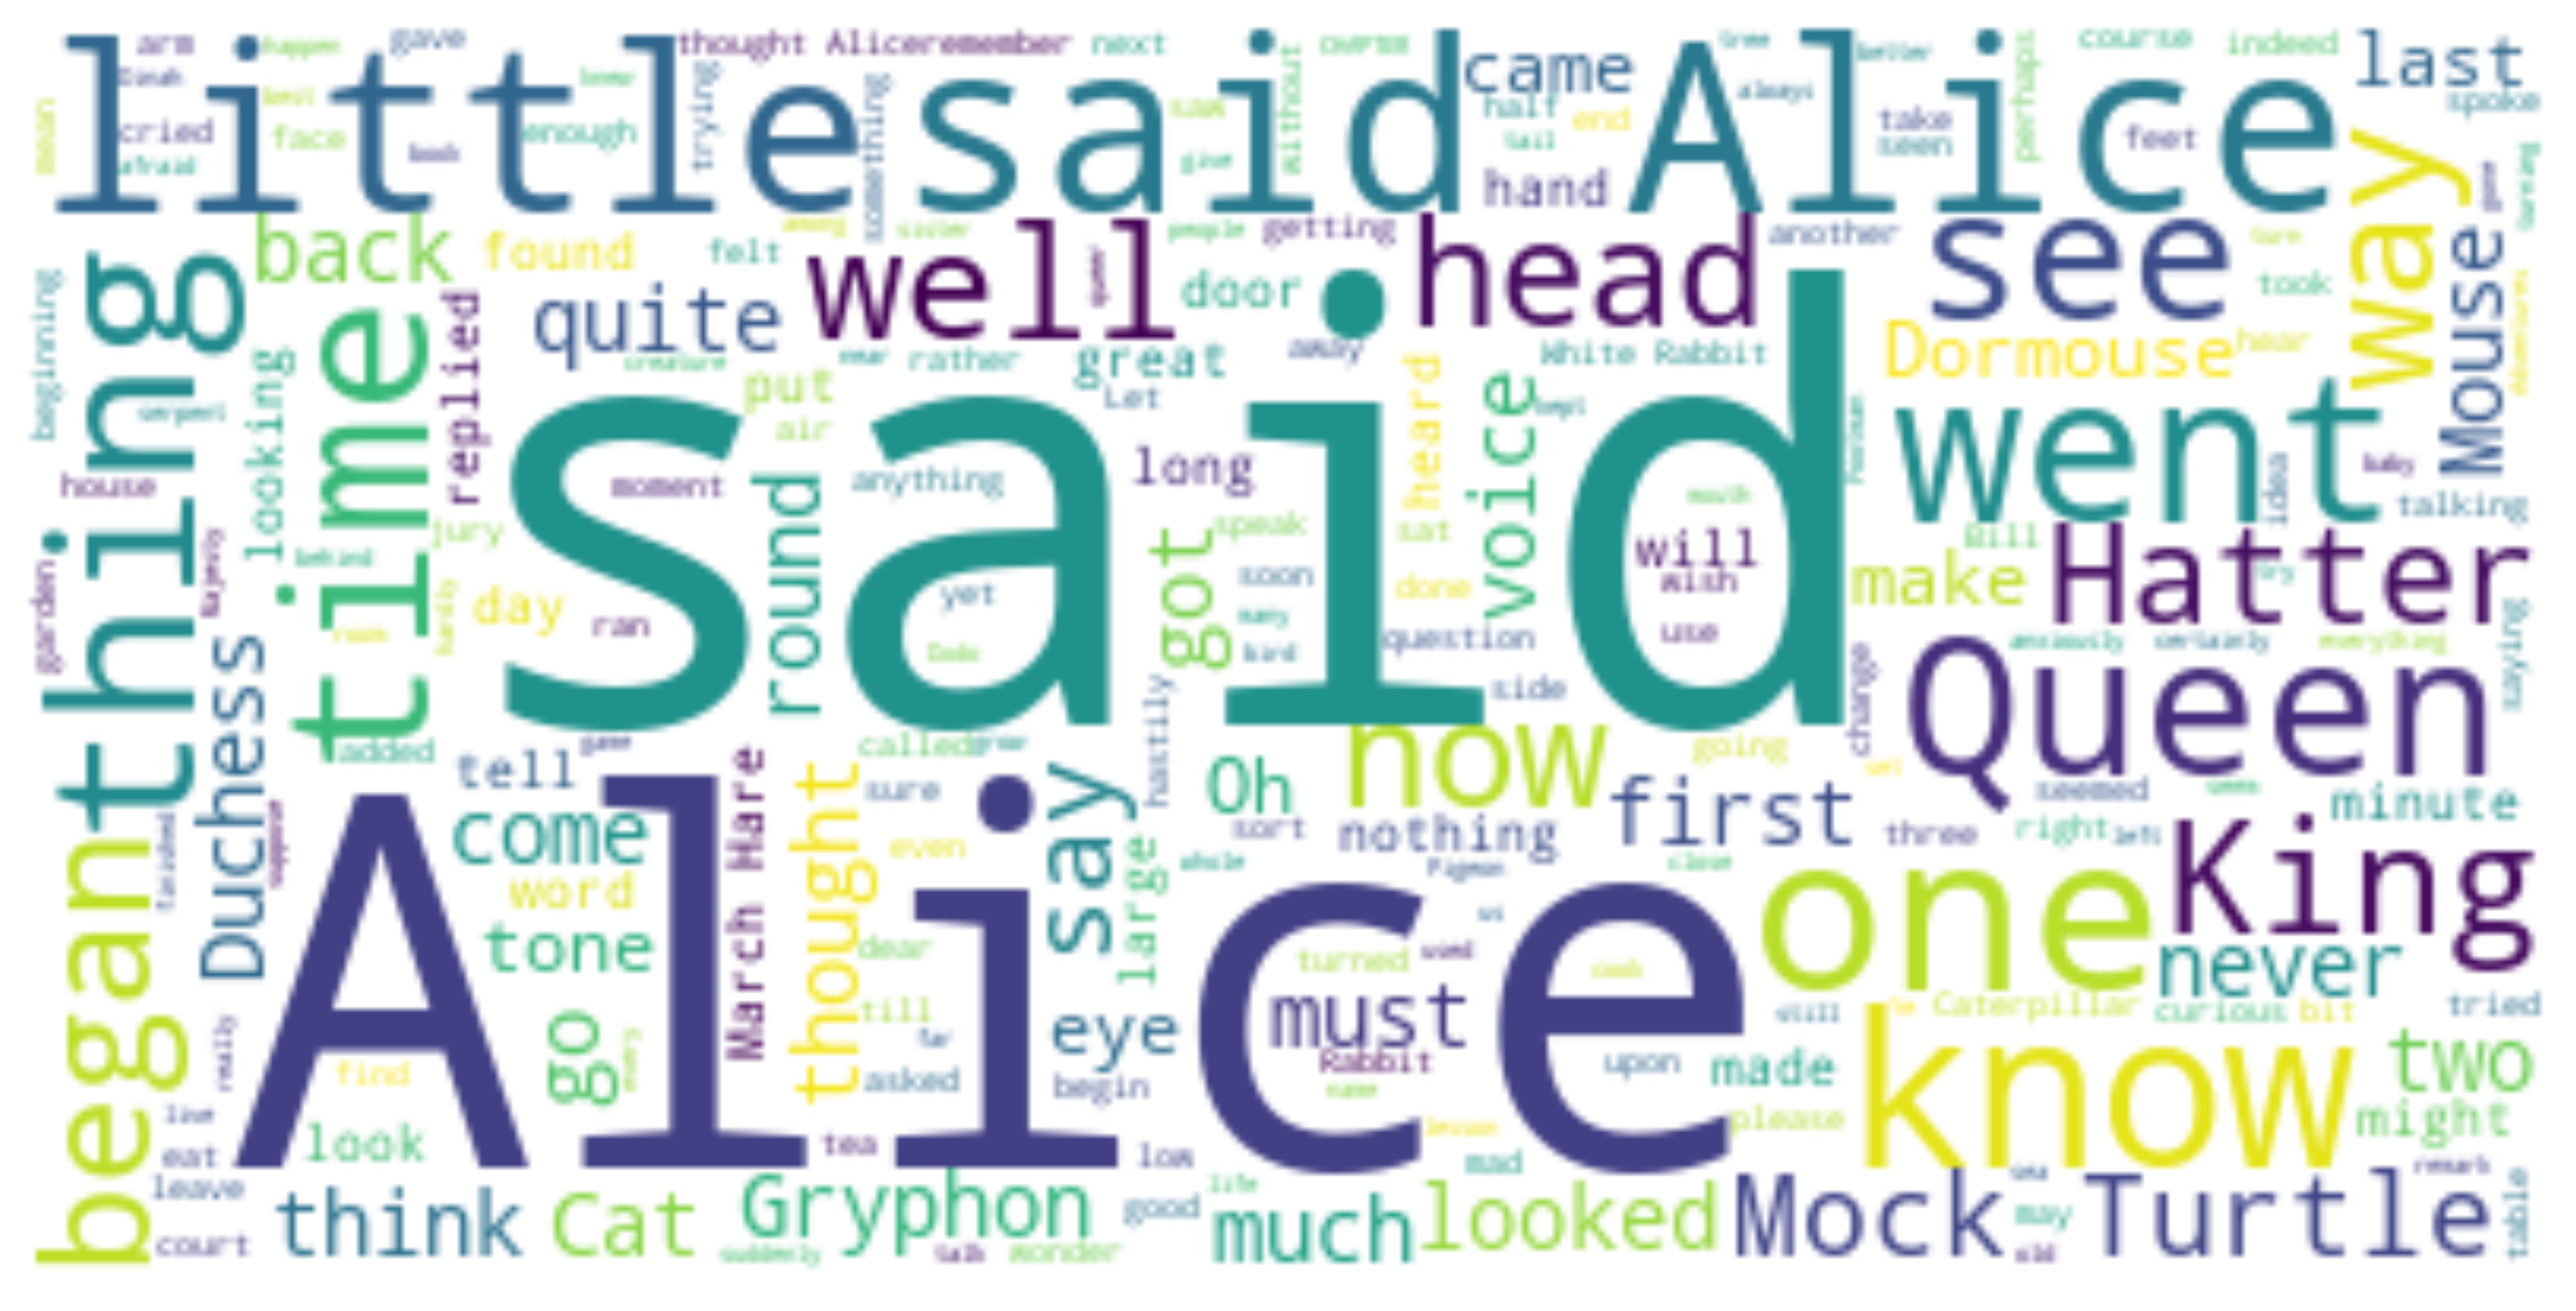

In [123]:
fig = plt.figure(dpi=500)
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [124]:
'said' in stop

False

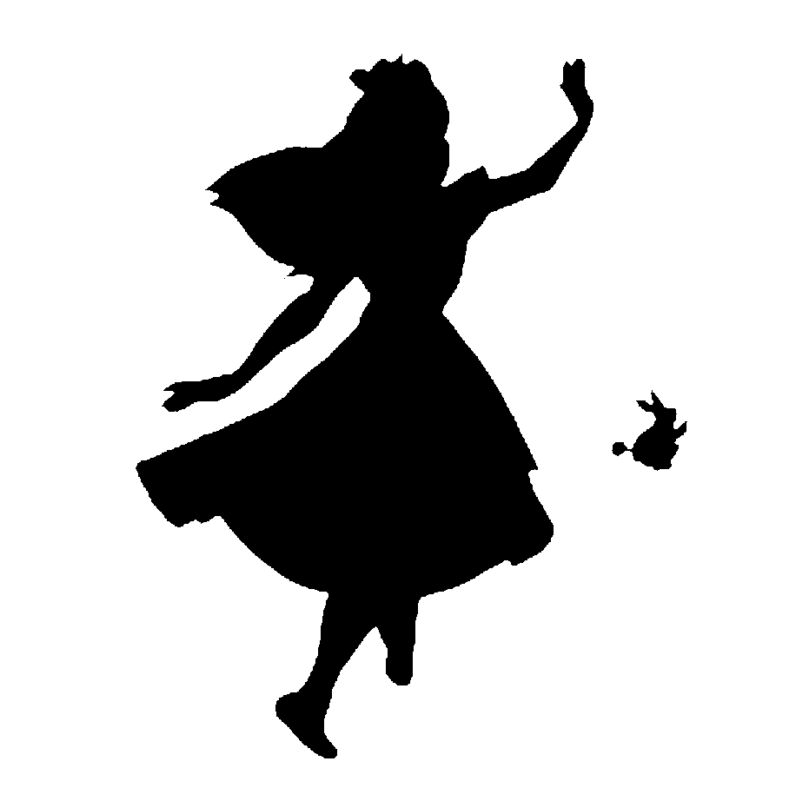

In [129]:
mask = np.array(Image.open('alice_mask.png'))
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

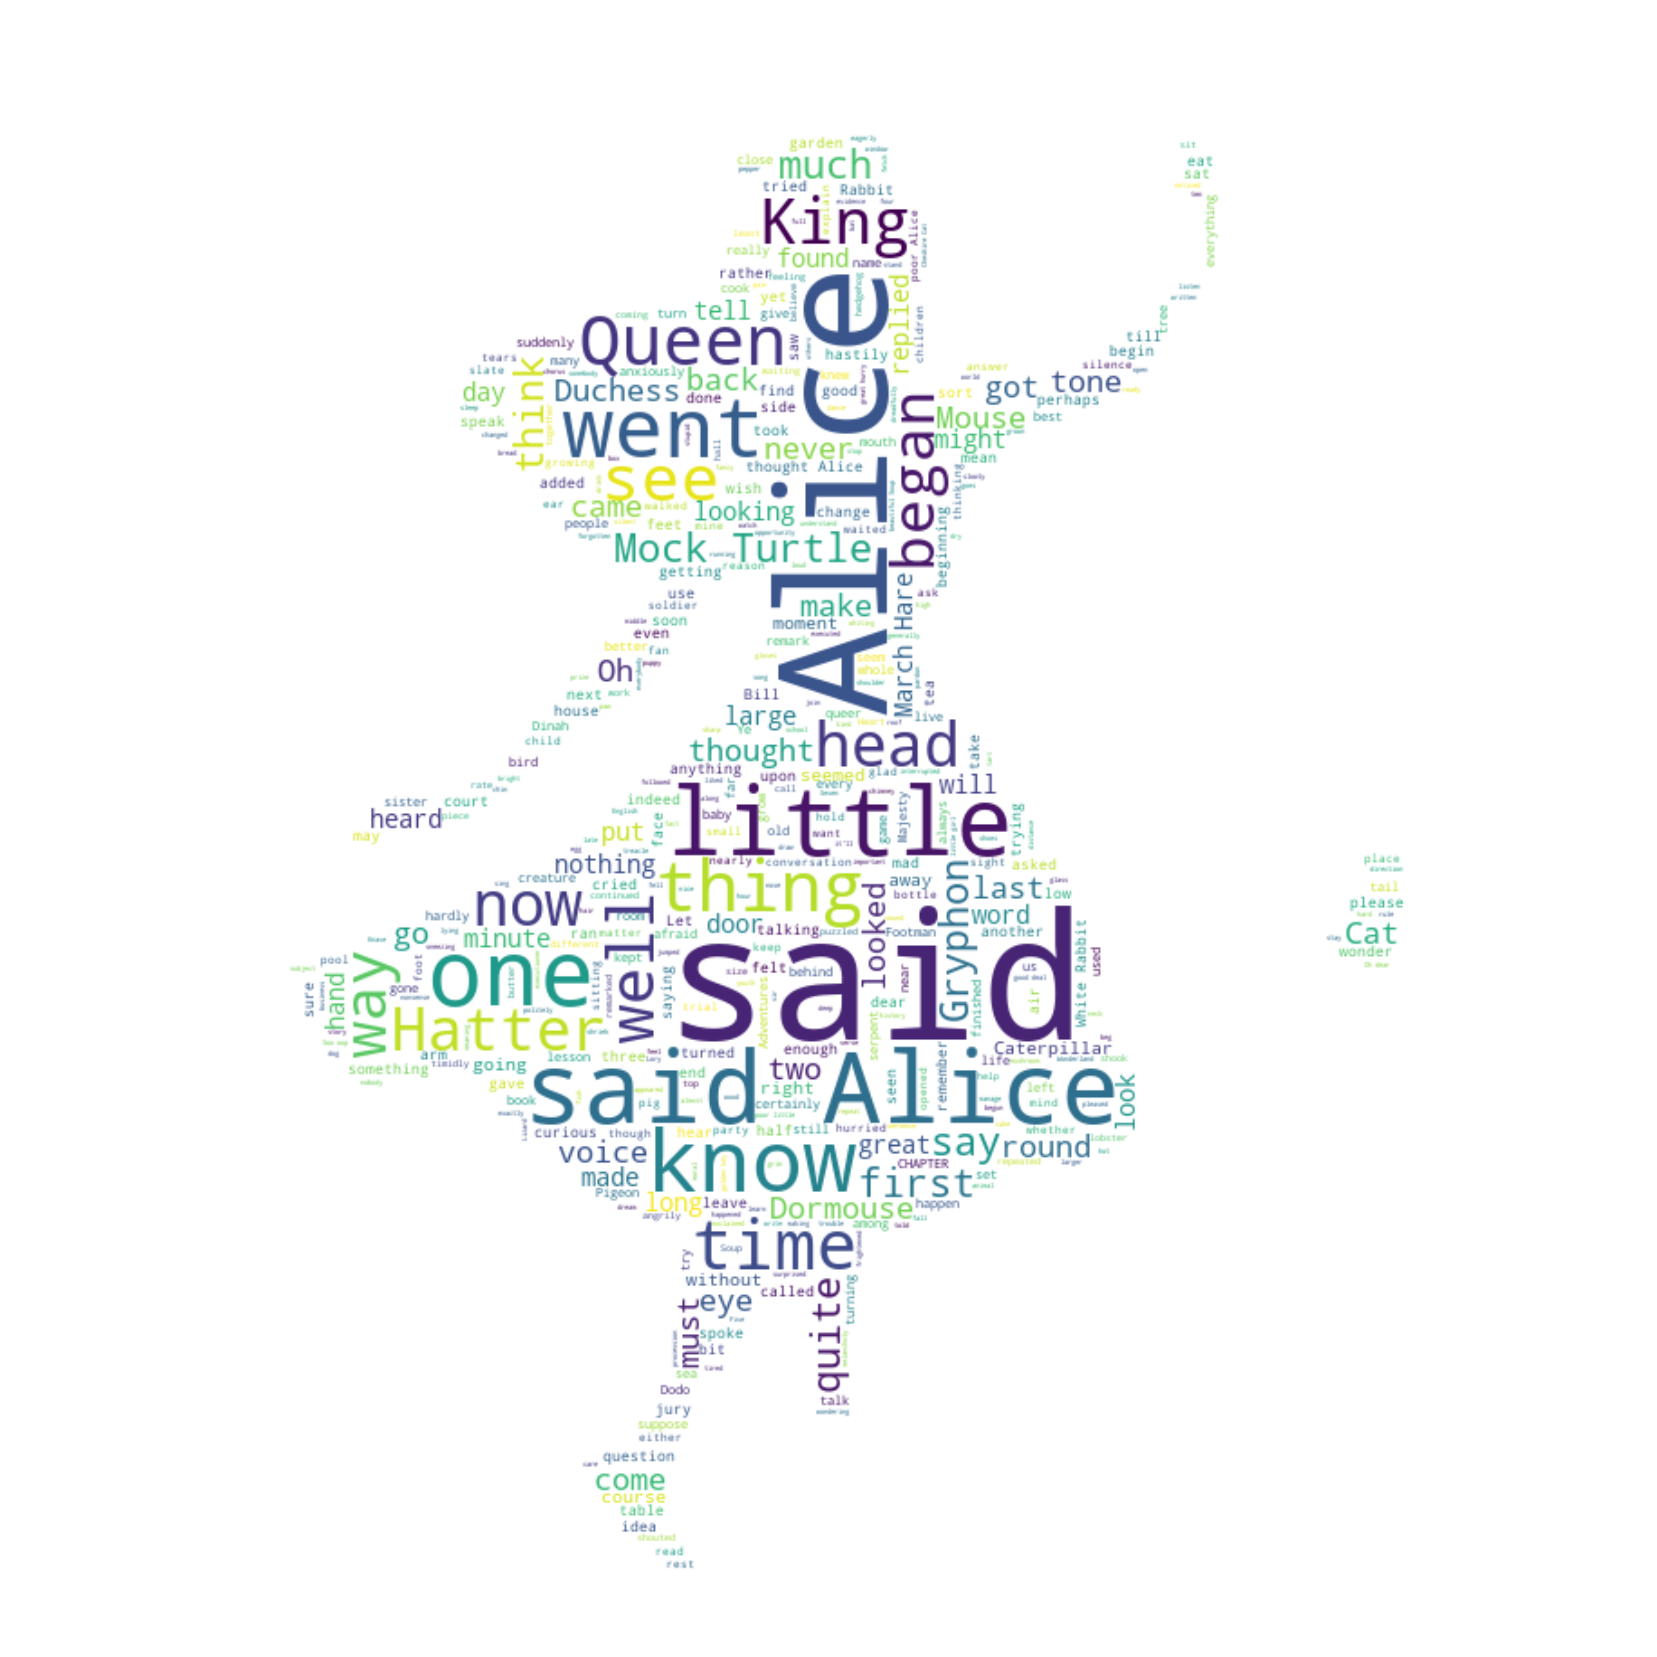

In [130]:
alice_wc = WordCloud(background_color='white',
                     max_words=2000,
                     mask=mask,
                     stopwords=stop)

alice_wc.generate(alice_novel)

fig = plt.figure(dpi=150)
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [134]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

year   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

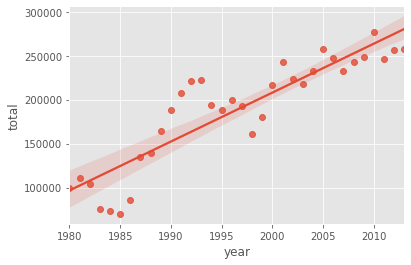

In [135]:
ax = sns.regplot(x='year', y='total', data=df_tot)